<a href="https://colab.research.google.com/github/ProfAI/machine-learning-fondamenti/blob/main/4%20-%20La%20Classificazione/binary_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# La Classificazione Binaria

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

### Generiamo il dataset

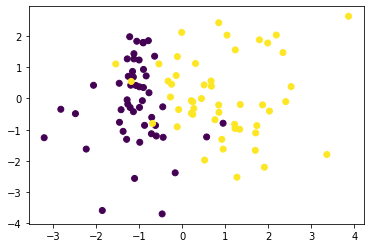

In [ ]:
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, n_classes=2, random_state=0)
plt.scatter(X[:,0], X[:,1], c=y)

### Creiamo il modello

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

### Visualizziamo il decision boundary

In [ ]:
# Il metodo meshgrid ci permette di creare una griglia di punti
# a = np.array([[1, 2, 3, 4, 5]])
# b = np.array([[10, 20, 30, 40, 50]])
# xx, yy = np.meshgrid(a, b)
# plt.scatter(xx, yy)

In [ ]:
def plot_decision_boundary(model, X, Y):
    
    h = .02 

    x_min, x_max = X[:, 0].min()-.1, X[:, 0].max()+.1
    y_min, y_max = X[:, 1].min()-.1, X[:, 1].max()+.1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

    X_m = X[Y==1]
    X_b = X[Y==0]
    plt.scatter(X_b[:, 0], X_b[:, 1], c="green",  edgecolor='white')
    plt.scatter(X_m[:, 0], X_m[:, 1], c="red",  edgecolor='white')


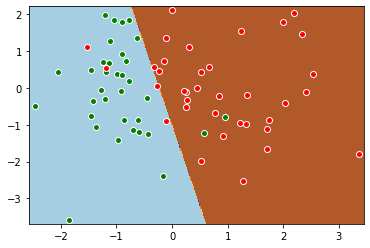

In [ ]:
plot_decision_boundary(lr, X_train, y_train)

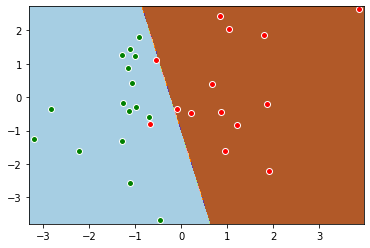

In [ ]:
plot_decision_boundary(lr, X_test, y_test)

### Valutiamo il modello

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, log_loss
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.metrics import plot_roc_curve

In [ ]:
y_pred_train = lr.predict(X_train)
y_proba_train = lr.predict_proba(X_train)
y_pred_test = lr.predict(X_test)
y_proba_test = lr.predict_proba(X_test)

In [ ]:
print(f"TRAIN LOSS: {log_loss(y_train, y_proba_train)}")
print(f"TEST LOSS: {log_loss(y_test, y_proba_test)}")

TRAIN LOSS: 0.31166393798252984
TEST LOSS: 0.20693769790978758


In [ ]:
def plot_confusion_matrix(y_true, y_pred, labels=["Negative", "Positive"], show_precision=True, show_recall=True):

  cm = confusion_matrix(y_true, y_pred) # tn, fp, fn, tp 

  df_cm = pd.DataFrame(cm, index = labels,
                    columns = ["Predicted "+labels[0],"Predicted "+labels[1]])
  sns.heatmap(df_cm, annot=True)

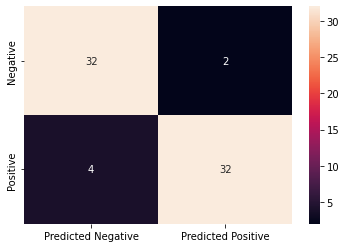

In [ ]:
plot_confusion_matrix(y_train, y_pred_train)

In [ ]:
def classification_report(y_true, y_pred):
  print(f"PRECISION: {precision_score(y_true, y_pred)}")
  print(f"RECALL: {recall_score(y_true, y_pred)}")
  print(f"F1: {f1_score(y_true, y_pred)}")
  print(f"ACCURACY: {accuracy_score(y_true, y_pred)}")

print("TRAIN REPORT")
classification_report(y_train, y_pred_train) # con l'argomento digits definiamo la precisione
print("\nTEST REPORT")
classification_report(y_test, y_pred_test)

TRAIN REPORT
PRECISION: 0.9411764705882353
RECALL: 0.8888888888888888
F1: 0.9142857142857143
ACCURACY: 0.9142857142857143

TEST REPORT
PRECISION: 1.0
RECALL: 0.8571428571428571
F1: 0.923076923076923
ACCURACY: 0.9333333333333333


In [ ]:
from sklearn.metrics import classification_report

print("TRAIN REPORT")
print(classification_report(y_train, y_pred_train)) # con l'argomento digits definiamo la precisione
print("TEST REPORT")
print(classification_report(y_test, y_pred_test))

TRAIN REPORT
              precision    recall  f1-score   support

           0       0.89      0.94      0.91        34
           1       0.94      0.89      0.91        36

    accuracy                           0.91        70
   macro avg       0.92      0.92      0.91        70
weighted avg       0.92      0.91      0.91        70

TEST REPORT
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        16
           1       1.00      0.86      0.92        14

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


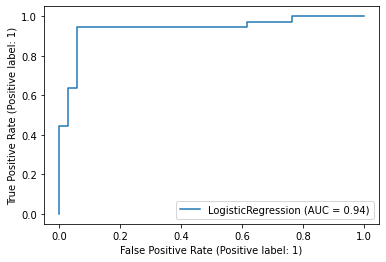

In [ ]:
plot_roc_curve(lr, X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


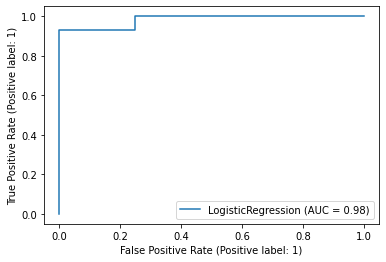

In [ ]:
plot_roc_curve(lr, X_test, y_test)